In [1]:
#PARLAD DHUNGANA
#PREDICTING FUTURE CONSUMPTION OF HEATING OIL BY NEW COSTUMER
#LINEAR REGRESSION MODELING
#########################################################
#Importing librairies
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline



$\huge{Project\ Scenario}$

A regional sales manager from a nationwide supply of fossil fuels for home heating wants to predict heating oil demand for the new customer. Her sales team is signing up thousands of new clients, and she wants to make sure the company will be able to meet this new level of demand. There are 42650 new customers and haven’t started consuming heating oil yet. She wants to know how much heating oil needs to keep in stock in order to meet these new customer demands.




$\huge{Goal}$

Predicting future consumption of heating oil of each household of 42650 new customers.

$\huge {Data \ attributes}$

$\textbf{Insulation:}$ the thickness of each home’s insulation, ranging from one to ten. A higher the number has excellently insulated, lower the number has poorly insulated.  

$\textbf{Temperature:}$ most recent year average outdoor temperature of each customer's home.

$\textbf{Heating_Oil:}$ most recent year heating oil purchased by each customer.

$\textbf{Num_Occupants:}$  total number of people living in the home. 

$\textbf{Home_Size:}$ the home’s overall size, on a scale from one to eight. The higher the number, the larger the size.  

$\textbf{Ave_Age:}$ the average age of occupier living in the home. 



$\huge {Data \ Preparation}$

In [2]:
#Loadin data
Train_data = pd.read_csv("Train_data.csv")
Test_data = pd.read_csv("Test_data.csv")

In [3]:
#Verifying loaded data
print("Train Data set: \n", Train_data.head(),'\n')
print("Test Data Set: \n", Test_data.head())

Train Data set: 
    Insulation  Temperature  Heating_Oil  Num_Occupants  Avg_Age  Home_Size
0           6           74          132              4     23.8          4
1          10           43          263              4     56.7          4
2           3           81          145              2     28.0          6
3           9           50          196              4     45.1          3
4           2           80          131              5     20.8          2 

Test Data Set: 
    Insulation  Temperature  Num_Occupants  Avg_Age  Home_Size
0           5           69             10     70.1          7
1           5           80              1     66.7          1
2           4           89              9     67.8          7
3           7           81              9     52.4          6
4           4           58              8     22.9          7


In [4]:
#checking shape of the data
print("\n Shape of Train Data set:" ,Train_data.shape,
      "\n Shape of Test Data Set:", Test_data.shape)



 Shape of Train Data set: (1218, 6) 
 Shape of Test Data Set: (42650, 5)


We can see that Train_data set and Test_data set to have the same attributes (variable)except Heating_oil in the Test_data set.
Our goal is to predict the Heating_oil for the Test_data set.
The Test_data set will be good for testing created models without any pre-existing Heating_oil
information and we will use "real world" data to predict future consumption of  heating oil for test_data set.


$\huge{ Data \ Cleaning}$

In [5]:
Train_data.duplicated().any()

False

There is no duplicated data in Train_data set

In [6]:
# check any missing value in Train_data 
Train_data.isnull().any()

Insulation       False
Temperature      False
Heating_Oil      False
Num_Occupants    False
Avg_Age          False
Home_Size        False
dtype: bool

No missing value in Train_data

In [7]:
#checking duplicate entries in Test_data
Test_data.duplicated().any()


True

There is some duplicate data in Test_data set.

In [8]:
print("There are ",Test_data.duplicated().sum(), " duplicate in Test_data set")


There are  36  duplicate in Test_data set


In [9]:
#printing duplicate data
#Test_data[Test_data.duplicated()]

In [10]:
#removing duplicate data
Test_data = Test_data.drop_duplicates()
#check any missing value in Test_data 
Test_data.isnull().any()

Insulation       False
Temperature      False
Num_Occupants    False
Avg_Age          False
Home_Size        False
dtype: bool

No missing values in Test_data

In [11]:
#check for any invalid Heating_oil

invalid_Heating_oil = Train_data['Heating_Oil']<=0
invalid_Heating_oil = Train_data[invalid_Heating_oil]
invalid_Heating_oil

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size


There is not any invalid Heating_Oil.

$ \huge {Exploratory\  Data \ Analysis}$

Descriptive statistics attributes. 

In [12]:
Train_data.describe()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,6.214286,65.078818,197.394089,3.113300,42.706404,4.649425
std,2.768094,16.932425,56.248267,1.690605,15.051137,2.321226
min,2.000000,38.000000,114.000000,1.000000,15.100000,1.000000
25%,4.000000,49.000000,148.250000,2.000000,29.700000,3.000000
50%,6.000000,60.000000,185.000000,3.000000,42.900000,5.000000
75%,9.000000,81.000000,253.000000,4.000000,55.600000,7.000000
max,10.000000,90.000000,301.000000,10.000000,72.200000,8.000000


The minimum, maximum, and range of these numbers all seem appropriate for their corresponding columns.
The mean and standard deviation do not indicate anything is obviously wrong with this data.



In [13]:
Test_data.describe()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
count,42614.000000,42614.000000,42614.000000,42614.000000,42614.000000
mean,5.989276,63.962078,5.489229,44.040926,4.495236
std,2.575525,15.314032,2.874810,16.737732,2.290777
min,2.000000,38.000000,1.000000,15.000000,1.000000
25%,4.000000,51.000000,3.000000,29.500000,3.000000
50%,6.000000,64.000000,5.000000,44.100000,4.000000
75%,8.000000,77.000000,8.000000,58.600000,6.000000
max,10.000000,90.000000,10.000000,73.000000,8.000000


The ranges are the same for all attributes of Train_data and test_data except Avg_Age. In the Test_data set, we have some observations where the Avg_Age is slightly below the Train_data set’s lower bound of 15.1, and some observations where the Test_data Avg_Age is slightly above the Train_set’s upper bound of 72.2.
These values are so close to the Train_data set’s values that it would not matter if we used our training data set to predict heating oil usage for the homes represented by these observations.

# Visualizing the correlation coefficient of each quantitative data.

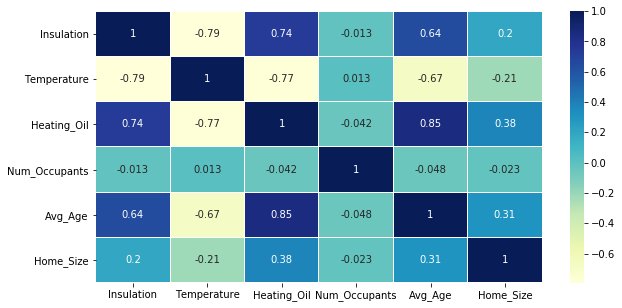

In [14]:
# Plot heatmap of all data with correlation coefficients visible
Train_data_corr = Train_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(Train_data_corr, cmap='YlGnBu', linewidth=.005, annot=True)

All correlation coefficients between 0 and 1 represent positive correlations, while all coefficients between 0 and -1 are negative correlations. Correlations that are positive mean that as one attribute’s value rises, the other attribute’s value also rises. But, a positive correlation also means that as one attribute’s value falls, the other’s also falls. Data analysts sometimes make the mistake in thinking that a negative correlation exists if an attribute’s values are decreasing, but if its corresponding attribute’s values are also decreasing, the correlation is still a positive one.

In the above correlation coefficient matrix, we can see that consumption of heating oil 
has a very strong positive correlation with average age, quite a strong positive correlation to 
insulation, and a weak positive correlation to the home size. 
However, the consumption of heating oil and the outer temperature of the home has a strong negative correlation. 
We also notice that number of occupants in the home and consumption of heating oil has a very weak correlation (do no have a correlation). 
Meaning that increasing or decreasing the number of occupants in a home does not affect the 
consumption of heating oil.




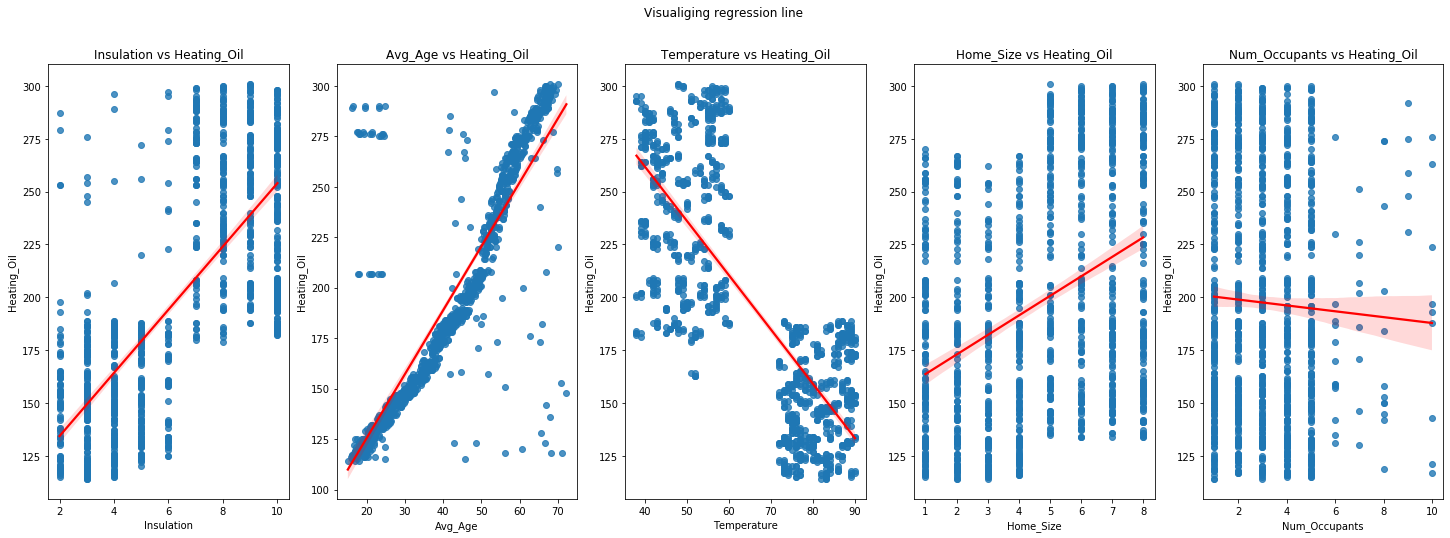

In [15]:

fig, axes = plt.subplots(1, 5, figsize=(25, 8), sharey=False)
fig.suptitle('Visualiging regression line')
sns.regplot(x='Insulation', y='Heating_Oil', data=Train_data,line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Insulation vs Heating_Oil')
sns.regplot(x='Avg_Age', y='Heating_Oil', data=Train_data,line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Avg_Age vs Heating_Oil')
sns.regplot(x='Temperature', y='Heating_Oil', data=Train_data,line_kws={'color':'red'}, ax=axes[2])
axes[2].set_title('Temperature vs Heating_Oil')
sns.regplot(x='Home_Size', y='Heating_Oil', data=Train_data, line_kws={'color':'red'},ax=axes[3])
axes[3].set_title('Home_Size vs Heating_Oil')
sns.regplot(x='Num_Occupants', y='Heating_Oil', data=Train_data,line_kws={'color':'red'}, ax=axes[4])
axes[4].set_title('Num_Occupants vs Heating_Oil')


plt.show();

Data is widely spread from the regression line and may need to be transformed. Heating_Oil is a strong positive correlation with Insulation and Ave_Age, a strong negative correlation with Temperature, and a weak positive correlation with Home_Size. But, very weak correlation with num_Occupants.

We noticed that consumption of heating oil and number of occupents do not have
correlation or very weak negative correlation. Thus, we remove the number of occupants.
It is not a statistically significant predictor of
heating oil usage in this data set


While the number of people living in a home might logically seem like a variable that
would influence energy usage, in our model it did not correlate in any significant way with
anything else. Sometimes there are attributes that don’t
turn out to be very interesting.

In [16]:
#Removing Num_Occupants from the Train_data set.
Train_data= Train_data.drop('Num_Occupants', axis = 1)
Train_data

,Insulation,Temperature,Heating_Oil,Avg_Age,Home_Size
0,6,74,132,23.8,4
1,10,43,263,56.7,4
2,3,81,145,28.0,6
3,9,50,196,45.1,3
4,2,80,131,20.8,2
...,...,...,...,...,...
1213,7,56,264,58.2,5
1214,5,78,129,22.5,1
1215,5,77,138,26.8,1
1216,3,89,156,34.0,2


In [17]:
#Removing Num_Occupants from the Test_data set.
Test_data= Test_data.drop('Num_Occupants', axis = 1)
Test_data

,Insulation,Temperature,Avg_Age,Home_Size
0,5,69,70.1,7
1,5,80,66.7,1
2,4,89,67.8,7
3,7,81,52.4,6
4,4,58,22.9,7
...,...,...,...,...
42645,7,63,59.1,8
42646,7,84,43.6,5
42647,2,67,27.3,4
42648,8,58,65.7,3


To create a basic training model, we split our Train_data set into x and y variables and assigned 20 % of 
the training data into testing data so that the model can be tested with data for which the consumption of heating oil is already known. This will result in the variables 
X_train, y_train, X_test, and y_test.

In [18]:
# Assign Heating_oil to "y" and all other features to "X". Split into training and testing variables.
X = Train_data[Train_data.loc[ : , Train_data.columns != 'Heating_Oil'].columns]
Y = Train_data[['Heating_Oil']]


X: column which contains all variables except Heating_Oil

Y: column which contains Heating_oil

In [19]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=1)

$\textbf{test_size=0.2:}$ we will split our dataset into 2 parts (training set, test set)
and the ratio of test set compare to dataset is 0.2. Normally, we should pick around 5% to 30%.

$\textbf{train_size:}$ if we use the test_size already, the rest of data will automatically be 
assigned to train_size.

$\textbf{random_state:}$ this is the seed for the random number generator.
We can put an instance of the RandomState class as well. 
If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

In [20]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Store linear regression predictions in variable
y_pred = regressor.predict(X_Train).round(2)
#Printing first five prediction
print(y_pred[0:5])

[[122.7 ]
 [156.27]
 [128.43]
 [272.58]
 [157.47]]


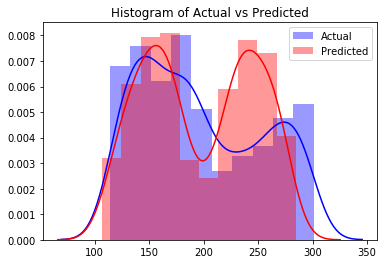

In [22]:
#Histogram of predicted vs actual
sns.distplot( Y_Train , color="blue", label="Actual")
sns.distplot( y_pred , color="red", label="Predicted")
plt.title("Histogram of Actual vs Predicted")
plt.legend()
 

In [23]:
print("Mean of Actual Heating_OIl:", Y_Train.mean().round(),"\n")
print("Mean of Predicted_Heating_OIL:", y_pred.mean().round(),"\n")


Mean of Actual Heating_OIl: Heating_Oil    197.0
dtype: float64 

Mean of Predicted_Heating_OIL: 197.0 



The predicted and actual Heatin_Oil are not extremely different. 
Histogram of predicted Heating_Oil is undefined (bimodal) and actual Heating_Oil histogram is right skewed.
But they have same mean 197.

In [24]:
#calculating residual.
residual = Y_Train - y_pred.round()


Residual is the difference between Actual value and Predicted value.
Residual help us to determine the accuracy of the model Sometimes it is called “errors.” Error in this
context doesn’t mean that there’s something wrong with the analysis; it just means that there is some
unexplained difference.
In other words, the residual is the error that isn’t
explained by the regression line.

If the residual is positive, our prediction is too low. 

If residual is negative our prediction is too high.

if residual is 0, our prediction is exactely correct.

In [25]:
#Adding three column (Actual heating oil, predicted heating oil, and residual) on the X_Train data
X_Train.assign(**{'Actual_Heating_Oil': Y_Train, 'Predicted_Heating_Oil': y_pred, 'Residual': residual})

,Insulation,Temperature,Avg_Age,Home_Size,Actual_Heating_Oil,Predicted_Heating_Oil,Residual
244,2,81,21.6,3,125,122.70,2.0
541,5,84,36.1,2,160,156.27,4.0
268,3,74,18.4,4,117,128.43,-11.0
205,10,47,64.7,6,285,272.58,12.0
632,4,85,38.8,2,173,157.47,16.0
...,...,...,...,...,...,...,...
715,10,44,56.9,6,259,259.46,0.0
905,7,57,47.1,4,199,213.09,-14.0
1096,8,56,58.6,7,287,249.35,38.0
235,3,86,37.8,4,170,157.36,13.0


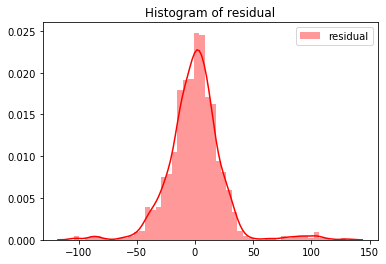

In [26]:
# histogram of Residual
sns.distplot( residual , color="red", label="residual")
plt.title("Histogram of residual")
plt.legend()
 


In [27]:
print("Mean of Residual:", residual.mean().round())


Mean of Residual: Heating_Oil    0.0
dtype: float64


Histogram of residual is symmetrical bell shaped curve (residual is normally distributed) and mean of residual 
is 0. 

Text(0.5, 1.0, 'Residual plot')

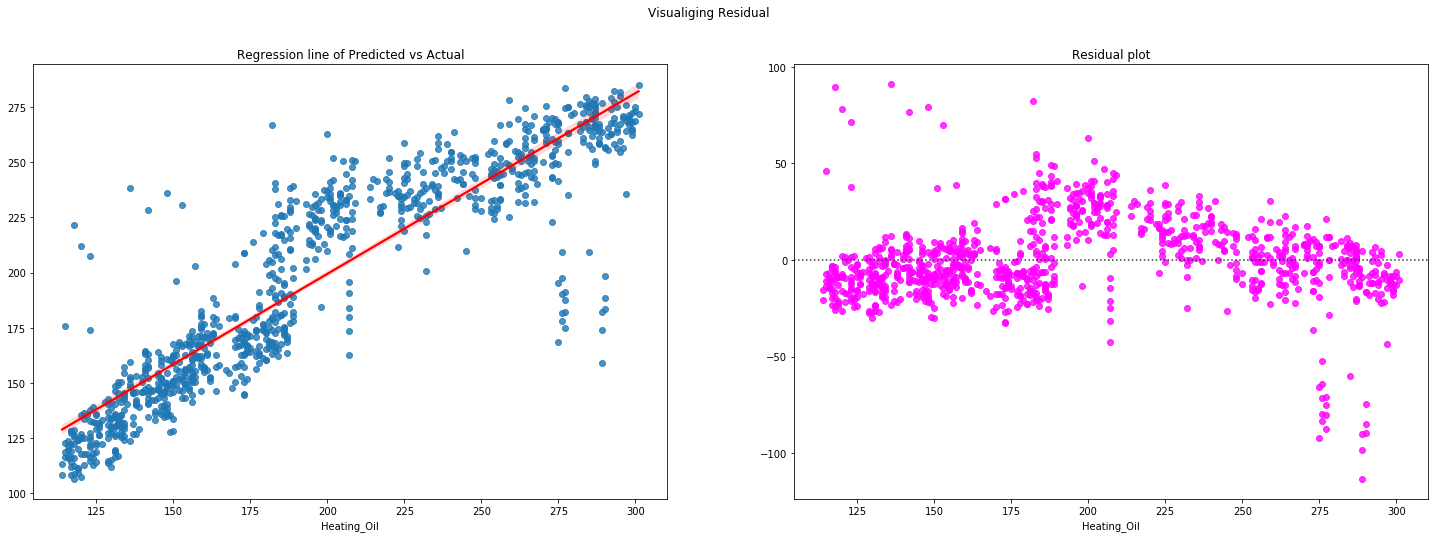

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=False)
fig.suptitle('Visualiging Residual')
sns.regplot(x =Y_Train, y= y_pred, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Regression line of Predicted vs Actual')
sns.residplot(Y_Train, y_pred, color='magenta', ax = axes[1])
axes[1].set_title('Residual plot')


If the points in the residual graph are randomly scattered around the horizontal
line, a linear regression model is appropriate for the data. On the left side of Figure 6,
it can be seen that there is a strong correlation between the predicted value of heating oil 
and the actual value of heating oil. In addition to that, residual points are randomly scattered 
around the horizontal line and the mean of residual is 0.
Thus, our predictive linear regression model is very accurate. and prediction is true.




In [29]:
#Predicting future consumption of heating_Oil of each new customer
#Calculating Estimate Heating Oil consumption of New Customer
y_pred_test = regressor.predict(Test_data).round()
y_pred_test[0:5]

array([[252.],
       [218.],
       [227.],
       [210.],
       [163.]])

In [30]:
#Adding one columns Predicting_Heating_Oil Test_Data set
Test_data['Predicted_Heating_Oil'] = y_pred_test.round()
Test_data

,Insulation,Temperature,Avg_Age,Home_Size,Predicted_Heating_Oil
0,5,69,70.1,7,252.0
1,5,80,66.7,1,218.0
2,4,89,67.8,7,227.0
3,7,81,52.4,6,210.0
4,4,58,22.9,7,163.0
...,...,...,...,...,...
42645,7,63,59.1,8,244.0
42646,7,84,43.6,5,187.0
42647,2,67,27.3,4,149.0
42648,8,58,65.7,3,250.0


In [31]:
print("Tota futur consumption of Heating Oil: ",y_pred_test.sum().round(),"Unit")

Tota futur consumption of Heating Oil:  8497159.0 Unit


In [32]:
print("Mean of predicted Heating Oil: ",y_pred_test.mean().round())

Mean of predicted Heating Oil:  199.0


Based on this data analysis, we can conclude that 8497186.0 unt of Heating Oil need to keep in stock in order
to meet the 42614 new customer’s demand. And each house hold expected to consume average 199.0 unit of heating oil 
in future.

Saving final result in csv format.

# Exporting Final Model

In [33]:
Test_data.to_csv(r'Final_Model.csv', index = False,header = True)